In [1]:
import sys
from pathlib import Path
p_root = Path('~/link/csMAHN_Spatial').expanduser()
sys.path.append(str(p_root)) if not str(p_root) in sys.path else None

In [2]:
from init import *
import os

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-30 19:00:36.203950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---------------------------------------------------------
[names import from utils.general]
----------------------------------------------------------
  Block Path json module_exists
  mpl np pd plt
  rng show_dict_key sns subset_dict

-------------------------func_help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



In [3]:
df = ut.df.iterdir('.',select='d',path_match_filter='*ipynb_checkpoints')
df.index = df['name'].to_numpy()
df = df.rename(columns={'path':'p_item','name':'item'}).loc[:,'item,p_item'.split(',')]
df['key'] = df['item'].apply(lambda x:''.join([_[0] for _ in  x.split('_')]))
assert df['key'].is_unique,'[Error] is not unique'

with Block('info'):
    df['h5_raw'] = df['p_item'].apply(lambda x:
        x.joinpath('{}_raw_feature_bc_matrix.h5'.format(x.name)))
    df['h5_filtered'] = df['p_item'].apply(lambda x:
        x.joinpath('{}_filtered_feature_bc_matrix.h5'.format(x.name)))
    
    # UMAP
    df['UMAP'] = df['p_item'].apply(lambda x:
        x.joinpath('analysis/umap/gene_expression_2_components',
                                          'projection.csv'))
    # t-sne
    df['tsne'] = df['p_item'].apply(lambda x:
        x.joinpath('analysis/tsne/gene_expression_2_components',
                                          'projection.csv'))
    # cluster
    df['cluster'] = df['p_item'].apply(lambda x:
        x.joinpath('analysis/clustering/gene_expression_graphclust',
                                    'clusters.csv'))
    
    # spatial
    df['positions'] = df['p_item'].apply(lambda x:
        x.joinpath('spatial','tissue_positions.csv'))
    df['images_path'] = df.apply(lambda row:{
        'lowres':row['p_item'].joinpath('spatial','tissue_lowres_image.png'),
        'hires':row['p_item'].joinpath('spatial','tissue_hires_image.png')
    },axis=1)
    df['scalefactors'] = df['p_item'].apply(lambda x:
        x.joinpath('spatial','scalefactors_json.json'))

df

,item,p_item,key,h5_raw,h5_filtered,UMAP,tsne,cluster,positions,images_path,scalefactors
V1_Mouse_Brain_Sagittal_Anterior_Section_2,V1_Mouse_Brain_Sagittal_Anterior_Section_2,V1_Mouse_Brain_Sagittal_Anterior_Section_2,VMBSAS2,V1_Mouse_Brain_Sagittal_Anterior_Section_2/V1_...,V1_Mouse_Brain_Sagittal_Anterior_Section_2/V1_...,V1_Mouse_Brain_Sagittal_Anterior_Section_2/ana...,V1_Mouse_Brain_Sagittal_Anterior_Section_2/ana...,V1_Mouse_Brain_Sagittal_Anterior_Section_2/ana...,V1_Mouse_Brain_Sagittal_Anterior_Section_2/spa...,{'lowres': V1_Mouse_Brain_Sagittal_Anterior_Se...,V1_Mouse_Brain_Sagittal_Anterior_Section_2/spa...
Visium_Fresh_Frozen_Adult_Mouse_Brain,Visium_Fresh_Frozen_Adult_Mouse_Brain,Visium_Fresh_Frozen_Adult_Mouse_Brain,VFFAMB,Visium_Fresh_Frozen_Adult_Mouse_Brain/Visium_F...,Visium_Fresh_Frozen_Adult_Mouse_Brain/Visium_F...,Visium_Fresh_Frozen_Adult_Mouse_Brain/analysis...,Visium_Fresh_Frozen_Adult_Mouse_Brain/analysis...,Visium_Fresh_Frozen_Adult_Mouse_Brain/analysis...,Visium_Fresh_Frozen_Adult_Mouse_Brain/spatial/...,{'lowres': Visium_Fresh_Frozen_Adult_Mouse_Bra...,Visium_Fresh_Frozen_Adult_Mouse_Brain/spatial/...
CytAssist_FFPE_Sagittal_Mouse_Brain,CytAssist_FFPE_Sagittal_Mouse_Brain,CytAssist_FFPE_Sagittal_Mouse_Brain,CFSMB,CytAssist_FFPE_Sagittal_Mouse_Brain/CytAssist_...,CytAssist_FFPE_Sagittal_Mouse_Brain/CytAssist_...,CytAssist_FFPE_Sagittal_Mouse_Brain/analysis/u...,CytAssist_FFPE_Sagittal_Mouse_Brain/analysis/t...,CytAssist_FFPE_Sagittal_Mouse_Brain/analysis/c...,CytAssist_FFPE_Sagittal_Mouse_Brain/spatial/ti...,{'lowres': CytAssist_FFPE_Sagittal_Mouse_Brain...,CytAssist_FFPE_Sagittal_Mouse_Brain/spatial/sc...


In [4]:
def _func_dict_path_exists(data):
    for k,v in data.items():
        if isinstance(v,dict):
            _func_dict_path_exists(v)
        elif isinstance(v,Path):
            print('\t{}\t{}'.format(v.exists(),k))
        else:
            print('\tstr\t{}'.format(v))

for i,row in df.iterrows():
    pass

# row = df.loc['V1_Mouse_Brain_Sagittal_Anterior_Section_2',:]
row = df.iloc[2,:]
for i,row in df.iterrows():
    print(row['item'].ljust(75,'-'))
    for _ in 'analysis,spatial'.split(','):
        if row['p_item'].joinpath('{}_{}.tar.gz'.format(row['item'],_)).exists() and \
        not row['p_item'].joinpath(_).exists():
            os.system('cd {} && tar -zxvf {}_{}.tar.gz && cd ..'\
                      .format(row['p_item'].absolute(),row['item'],_))
    _func_dict_path_exists(row)

V1_Mouse_Brain_Sagittal_Anterior_Section_2---------------------------------
	str	V1_Mouse_Brain_Sagittal_Anterior_Section_2
	True	p_item
	str	VMBSAS2
	True	h5_raw
	True	h5_filtered
	True	UMAP
	True	tsne
	True	cluster
	True	positions
	True	lowres
	True	hires
	True	scalefactors
Visium_Fresh_Frozen_Adult_Mouse_Brain--------------------------------------
	str	Visium_Fresh_Frozen_Adult_Mouse_Brain
	True	p_item
	str	VFFAMB
	True	h5_raw
	True	h5_filtered
	True	UMAP
	True	tsne
	True	cluster
	True	positions
	True	lowres
	True	hires
	True	scalefactors
CytAssist_FFPE_Sagittal_Mouse_Brain----------------------------------------
	str	CytAssist_FFPE_Sagittal_Mouse_Brain
	True	p_item
	str	CFSMB
	True	h5_raw
	True	h5_filtered
	True	UMAP
	True	tsne
	True	cluster
	True	positions
	True	lowres
	True	hires
	True	scalefactors


In [5]:
dict_adata = {}
for i,row in df.iterrows():
    p_out = p_cache.joinpath('Brain_mm_{}'.format(row['item']))
    # if p_out.exists():
    #     continue
    
    adata = sc.read_10x_h5(row['h5_filtered'])
    adata.var_names_make_unique()
    
    adata.obs['_batch'] = row['item']
    
    df_parameter = pd.read_csv(row['UMAP'],index_col=0)\
    .join(pd.read_csv(row['tsne'],index_col=0))\
    .join(pd.read_csv(row['cluster'],index_col=0))\
    .join(pd.read_csv(row['positions'],index_col=0))
    df_parameter = df_parameter.rename(columns={'UMAP-1':'UMAP1','UMAP-2':'UMAP2'})
    
    assert pd.Series(adata.obs.index.isin(df_parameter.index)).all()
    adata.obs = adata.obs.loc[:,['_batch']].join(df_parameter)
    
    ut.sc.load_obsm_from_obs(adata,keys_obs='TSNE-1,TSNE-2'.split(','),key_obsm='X_tsne')
    ut.sc.load_obsm_UMAP(adata,keys_umap='UMAP1,UMAP2'.split(','))
    ut.sc.load_obsm_spatial(adata,keys_pixel='pxl_row_in_fullres,pxl_col_in_fullres'.split(','))
    ut.sc.load_uns_spatial(adata,key_uns_spatial=row['item'],path_imgs=row['images_path'],
                           path_jsons=subset_dict(row,'scalefactors'))
    ut.sc.show(adata,show_check_unique=True,show_X_gt_zero=True)
    ut.sc.save_as_mtx(adata,p_out)
    dict_adata[row['key']] = adata
    del adata,p_out

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[check unique]
	obs.index	var.index
	True		True


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


,_batch,UMAP1,UMAP2,TSNE-1,TSNE-2,Cluster,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
AAACAAGTATCTCCCA-1,V1_Mouse_Brain_Sagittal_Anterior_Section_2,1.741533,-1.433834,-8.090308,8.473309,5,1,50,102,7608,8599
AAACACCAATAACTGC-1,V1_Mouse_Brain_Sagittal_Anterior_Section_2,-1.337321,-7.645915,-9.519718,-31.683182,6,1,59,19,8686,2886


(2823, 11)

matrix([[  2.,   2.,   1., ...,   1., 225.,   3.]], dtype=float32)

frist 10 matrix nonzero elements:
 [[2 2 1 1 3 2 1 1 1 8]]
[save] spatial info
[out] /public/workspace/licanchengup/link/csMAHN_Spatial/dataset/cache/Brain_mm_V1_Mouse_Brain_Sagittal_Anterior_Section_2


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[check unique]
	obs.index	var.index
	True		True


,_batch,UMAP1,UMAP2,TSNE-1,TSNE-2,Cluster,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
AAACAAGTATCTCCCA-1,Visium_Fresh_Frozen_Adult_Mouse_Brain,6.877725,3.760584,24.791698,-28.122540,7,1,50,102,7317,9621
AAACAGAGCGACTCCT-1,Visium_Fresh_Frozen_Adult_Mouse_Brain,-5.274061,-6.317486,-9.608532,28.322383,2,1,14,94,2989,9078


(2797, 11)

matrix([[  1.,   1.,   3., ...,  21., 167.,   1.]], dtype=float32)

frist 10 matrix nonzero elements:
 [[1 1 3 1 1 1 1 1 1 1]]
[save] spatial info
[out] /public/workspace/licanchengup/link/csMAHN_Spatial/dataset/cache/Brain_mm_Visium_Fresh_Frozen_Adult_Mouse_Brain


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[check unique]
	obs.index	var.index
	True		True


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


,_batch,UMAP1,UMAP2,TSNE-1,TSNE-2,Cluster,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
AACAATGGAACCACAT-1,CytAssist_FFPE_Sagittal_Mouse_Brain,-1.227369,6.723101,-41.794374,-14.807540,8,1,54,32,28233,3508
AACAATGTGCTCCGAG-1,CytAssist_FFPE_Sagittal_Mouse_Brain,2.741302,17.867296,11.565926,24.725524,3,1,98,158,14539,26655


(8462, 11)

matrix([[ 1.,  1.,  3., ..., 18.,  1.,  2.]], dtype=float32)

frist 10 matrix nonzero elements:
 [[1 1 3 1 5 1 1 4 1 4]]
[save] spatial info
[out] /public/workspace/licanchengup/link/csMAHN_Spatial/dataset/cache/Brain_mm_CytAssist_FFPE_Sagittal_Mouse_Brain


In [6]:
adata = sc.concat(dict_adata,index_unique=';')
ut.sc.load_obsm_from_obs(adata,keys_obs='TSNE-1,TSNE-2'.split(','),key_obsm='X_tsne')
ut.sc.load_obsm_UMAP(adata,keys_umap='UMAP1,UMAP2'.split(','))
ut.sc.load_obsm_spatial(adata,keys_pixel='pxl_row_in_fullres,pxl_col_in_fullres'.split(','))
for i,row in df.iterrows():
    ut.sc.load_uns_spatial(adata,key_uns_spatial=row['item'],path_imgs=row['images_path'],
                           path_jsons=subset_dict(row,'scalefactors'))
del dict_adata
ut.sc.show(adata,show_check_unique=True,show_key_images=True)

[check unique]
	obs.index	var.index
	True		True


,_batch,UMAP1,UMAP2,TSNE-1,TSNE-2,Cluster,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
AAACAAGTATCTCCCA-1;VMBSAS2,V1_Mouse_Brain_Sagittal_Anterior_Section_2,1.741533,-1.433834,-8.090308,8.473309,5,1,50,102,7608,8599
AAACACCAATAACTGC-1;VMBSAS2,V1_Mouse_Brain_Sagittal_Anterior_Section_2,-1.337321,-7.645915,-9.519718,-31.683182,6,1,59,19,8686,2886


(14082, 11)

Empty DataFrame
Columns: []
Index: [(CytAssist_FFPE_Sagittal_Mouse_Brain, hires), (CytAssist_FFPE_Sagittal_Mouse_Brain, lowres), (V1_Mouse_Brain_Sagittal_Anterior_Section_2, hires), (V1_Mouse_Brain_Sagittal_Anterior_Section_2, lowres), (Visium_Fresh_Frozen_Adult_Mouse_Brain, hires), (Visium_Fresh_Frozen_Adult_Mouse_Brain, lowres)]

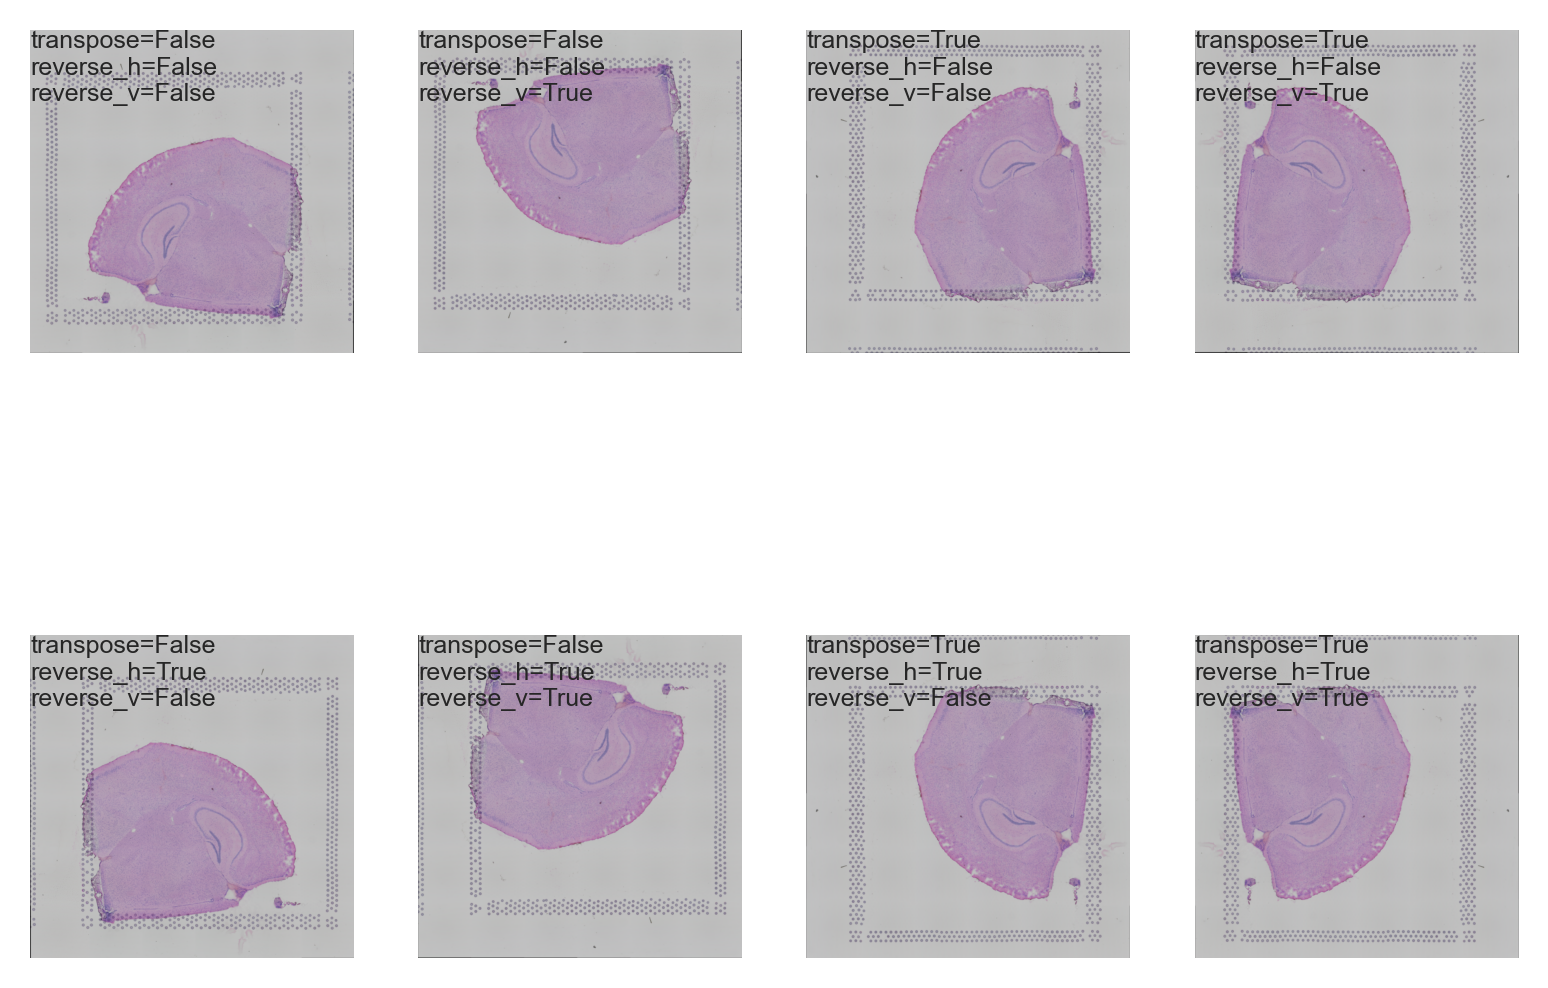

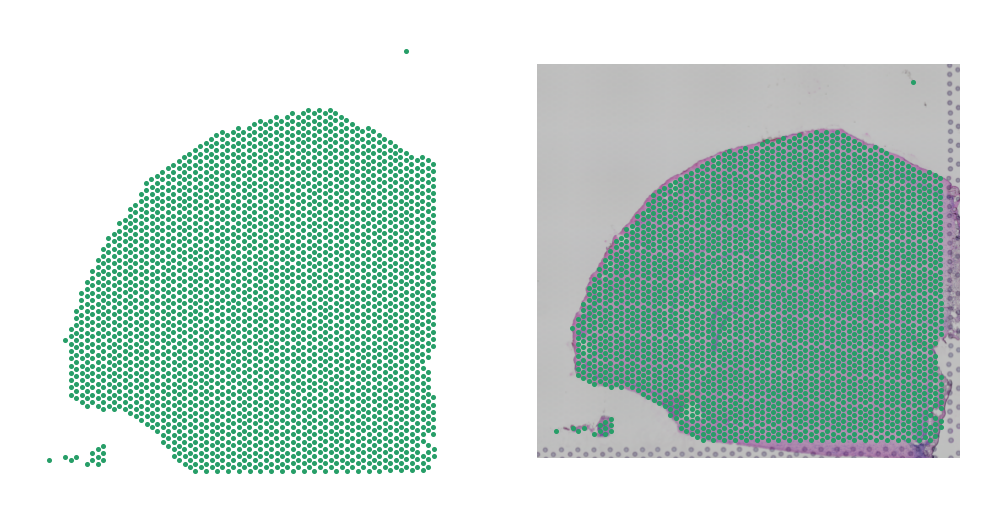

In [7]:
dict_context = {
    'key_uns_spatial':'Visium_Fresh_Frozen_Adult_Mouse_Brain',
    'key_img':'lowres','kw_reverse_img':{k:v
        for k,v in zip('reverse_h,reverse_v,transpose'.split(','),[0,0,1])}}
dict_context.update({'adata':ut.sc.subset_adata(adata,'_batch',
        dict_context['key_uns_spatial'])})
with Block('',context = dict_context) as context:
    ut.sc.load_spatial_images(context.adata,key_uns_spatial=context.key_uns_spatial,
                              key_images=context.key_img,
                              kw_reverse_img=context.kw_reverse_img,
                              update_images=True)
    img_arr = ut.sc.get_img(context.adata,key_uns_spatial=context.key_uns_spatial,
                            key_img=context.key_img)
    ut.sc.show_reverse_img(img_arr)
    fig,axs = pl.figure.subplots_get_fig_axs(1,2)
    ax = axs[0]
    ut.sc.pl.spatial(context.adata,
                     key='_batch',key_uns_spatial=context.key_uns_spatial,
                     key_img=context.key_img,ax=ax,draw_img=False)
    ax = axs[1]
    ut.sc.pl.spatial(context.adata,
                     key='_batch',key_uns_spatial=context.key_uns_spatial,
                     key_img=context.key_img,ax=ax)


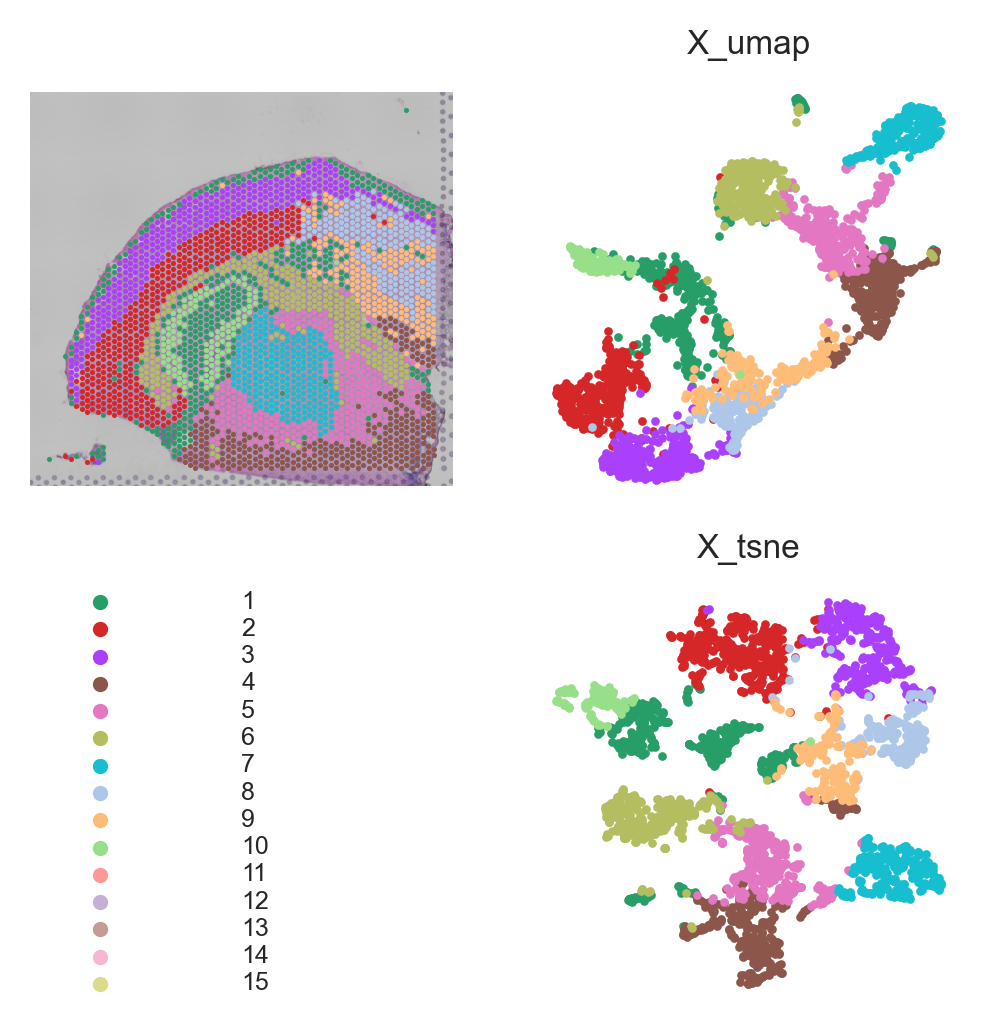

In [8]:
adata.obs['Cluster'] = adata.obs['Cluster'].astype(str)
colormap = pl.colormap.get(adata.obs['Cluster'].value_counts().index)
adata.obs.dtypes

with Block('',context = dict_context) as context:
    fig,axs = pl.figure.subplots_get_fig_axs(2,2)
    ax = axs[0]
    ut.sc.pl.spatial(context.adata,
                     key='Cluster',key_uns_spatial=context.key_uns_spatial,
                     key_img=context.key_img,
                     colormap =colormap,ax=ax)
    ax = axs[1]
    ut.sc.pl.umap(context.adata,key='Cluster',colormap =colormap,ax=ax,key_obsm='X_umap')
    ax.set_title('X_umap')
    ax = axs[2]
    pl.colormap.show(colormap,ax=ax)
    ax.set_ymargin(.05)
    ax = axs[3]
    ut.sc.pl.umap(context.adata,key='Cluster',colormap =colormap,ax=ax,key_obsm='X_tsne')
    ax.set_title('X_tsne')
    

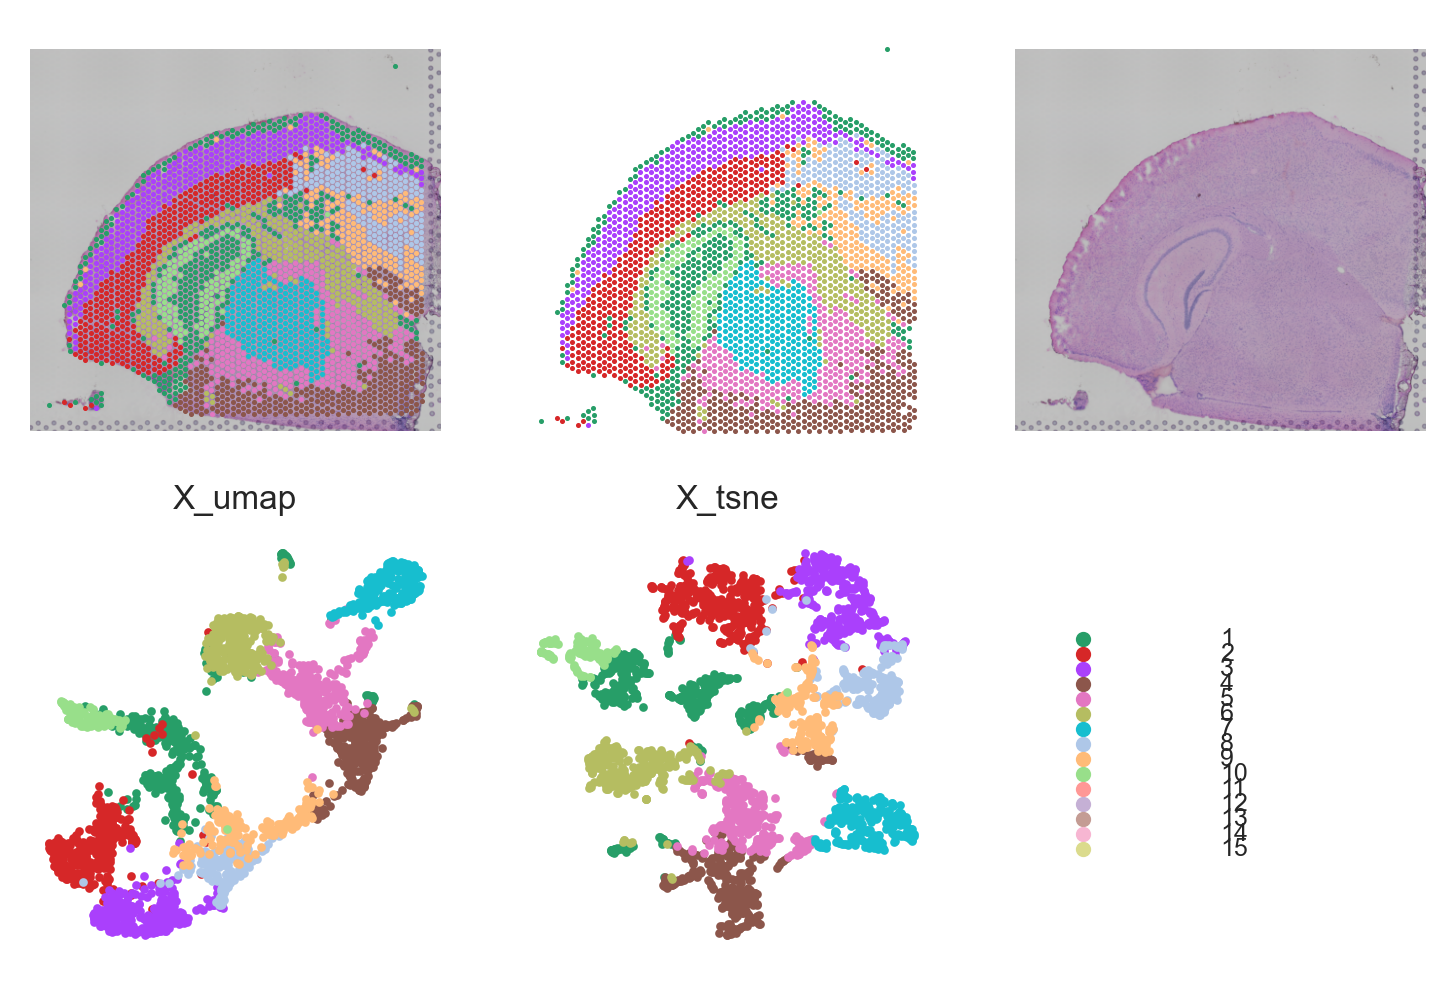

In [9]:
with Block('',context = dict_context) as context:
    fig,axs = pl.figure.subplots_get_fig_axs(2,3)
    ax = axs[0]
    ut.sc.pl.spatial(context.adata,key='Cluster',key_img=context.key_img,
                     key_uns_spatial=context.key_uns_spatial,
                     colormap =colormap,ax=ax)
    ax = axs[1]
    ut.sc.pl.spatial(context.adata,key='Cluster',key_img=context.key_img,
                     key_uns_spatial=context.key_uns_spatial,
                     colormap =colormap,ax=ax,draw_img=False)
    ax = axs[2]
    ut.sc.pl.spatial(context.adata,key='Cluster',key_img=context.key_img,
                     key_uns_spatial=context.key_uns_spatial,
                     colormap =colormap,ax=ax,draw_scatter=False)
    ax = axs[3]
    ut.sc.pl.umap(context.adata,key='Cluster',colormap =colormap,ax=ax,key_obsm='X_umap')
    ax.set_title('X_umap')
    ax = axs[4]
    ut.sc.pl.umap(context.adata,key='Cluster',colormap =colormap,ax=ax,key_obsm='X_tsne')
    ax.set_title('X_tsne')
    ax = axs[5]
    pl.colormap.show(colormap,ax=ax)

In [10]:
ut.sc.show(adata,show_check_unique=True,show_key_images=True)

[check unique]
	obs.index	var.index
	True		True


,_batch,UMAP1,UMAP2,TSNE-1,TSNE-2,Cluster,in_tissue,array_row,array_col,pxl_row_in_fullres,pxl_col_in_fullres
AAACAAGTATCTCCCA-1;VMBSAS2,V1_Mouse_Brain_Sagittal_Anterior_Section_2,1.741533,-1.433834,-8.090308,8.473309,5,1,50,102,7608,8599
AAACACCAATAACTGC-1;VMBSAS2,V1_Mouse_Brain_Sagittal_Anterior_Section_2,-1.337321,-7.645915,-9.519718,-31.683182,6,1,59,19,8686,2886


(14082, 11)

Empty DataFrame
Columns: []
Index: [(CytAssist_FFPE_Sagittal_Mouse_Brain, hires), (CytAssist_FFPE_Sagittal_Mouse_Brain, lowres), (V1_Mouse_Brain_Sagittal_Anterior_Section_2, hires), (V1_Mouse_Brain_Sagittal_Anterior_Section_2, lowres), (Visium_Fresh_Frozen_Adult_Mouse_Brain, lowres)]

In [11]:
p_out = p_cache.joinpath('Brain_mm')
ut.sc.save_as_mtx(adata,p_out)

frist 10 matrix nonzero elements:
 [[2 1 3 2 1 1 1 2 3 1]]
[save] spatial info
[out] /public/workspace/licanchengup/link/csMAHN_Spatial/dataset/cache/Brain_mm
